# Comparison between Hamiltonian and Nambu Dynamics

- Hamiltonian Dynamics: 
    - H = p^2 / 2m + kx^2 / 2
- Nambu Dynamics: 
    - H = p^2 / 2m + kx^2 / 2 + r^2 / 2m
    - G = r^2 / 2m + kx^2 / 4
    - H - G = p^2 / 2m + kx^2 / 4

If we set k in Nambu Dynamics to be twice as large as in Hamiltonian Dynamics, then the effective Hamiltonian is the same as the Hamiltonian Dynamics.

r seems a free parameter, which can be tuned to see different behaviors.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from module.hamilton_class import HamiltonSystem
from module.plot_class import Plotter
from module.nambu_class import NambuSystem

## Harmonic Oscillator

In [2]:
# Define the parameters
t_max = 30.0  # Maximum time

# Fixed initial condition
x0, p0 = 0.0, 1.0

### Hamiltonian Dynamics

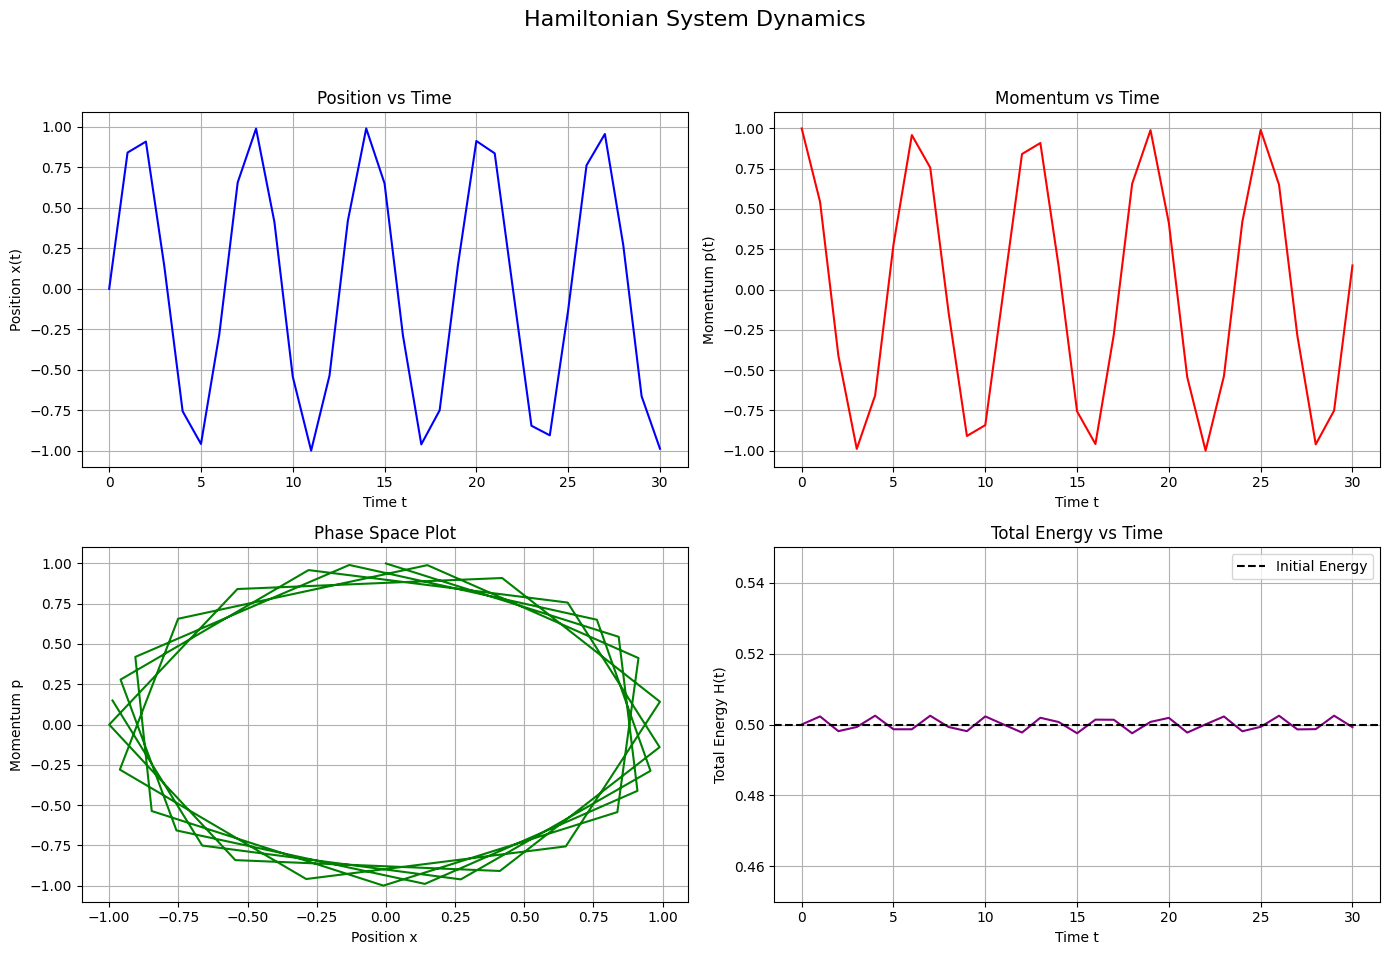

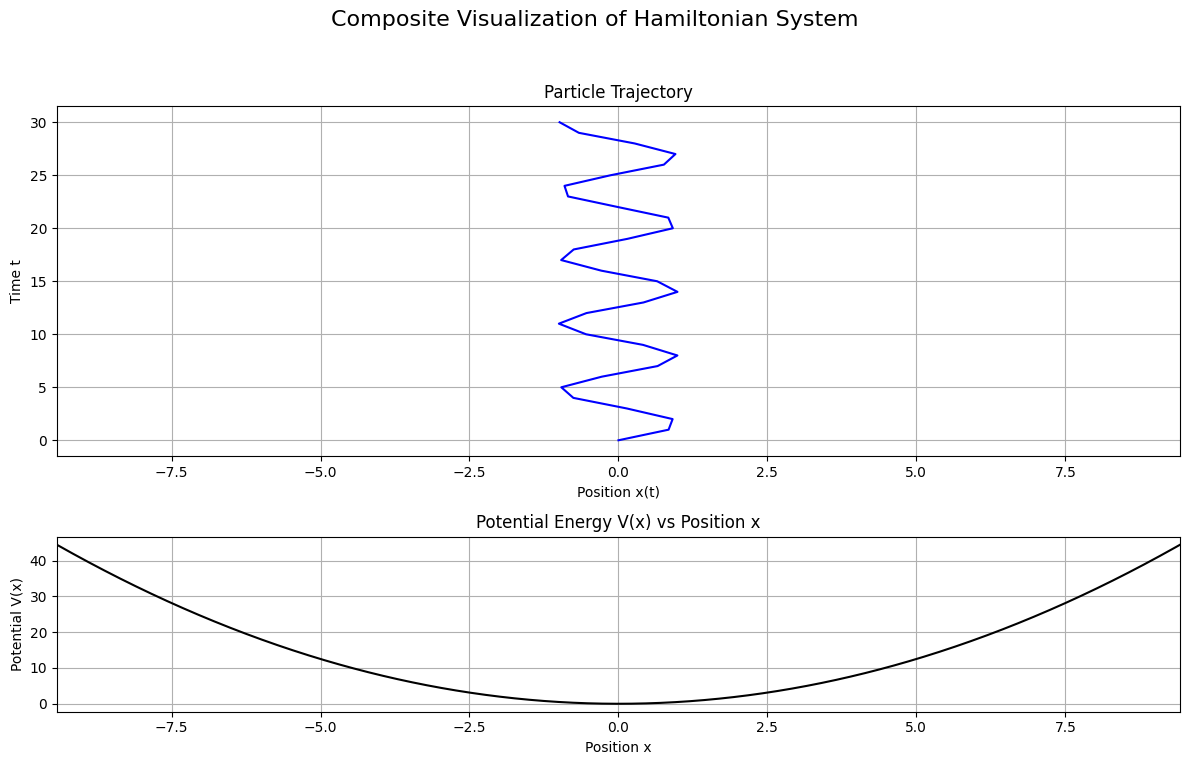

In [3]:
# Define the parameters
delta_t = 0.01  # Time step
k1 = 1.0  # Spring constant
m = 1.0  # Mass

def p_dot(x, p):
    return -k1 * x  # For a simple harmonic oscillator, dp/dt = -k x

def x_dot(x, p):
    return p / m  # For a simple harmonic oscillator, dx/dt = p / m

# Create Hamiltonian system
hamilton_system = HamiltonSystem(p_dot, x_dot, t_max, delta_t)

# Simulate for the fixed initial condition
t_array, x_array, p_array = hamilton_system.simulate(x0, p0)

# Sample the data
t_sampled, x_sampled, p_sampled = hamilton_system.pick_data(t_array, x_array, p_array)

# Calculate energy
energy_sampled = 0.5 * (p_sampled**2) / m + k1 * (x_sampled**2) / 2
potential = lambda x: k1 * (x**2) / 2

# Plotting
plotter = Plotter()
plotter.static_plots(t_sampled, x_sampled, p_sampled, energy_sampled)
plotter.trajectory_plot(x_sampled, t_sampled, potential)

### Nambu Dynamics

In [4]:
'''
H = p^2 / 2m + kx^2 / 2 + r^2 / 2m
G = r^2 / 2m + kx^2 / 4

x_dot = dH/dp * dG/dr - dH/dr * dG/dp
p_dot = dH/dr * dG/dx - dH/dx * dG/dr
r_dot = dH/dx * dG/dp - dH/dp * dG/dx
'''

# Define the parameters
k2 = 2.0  # * make it twice as large as the hamiltonian, so that the effective H is the same as the hamiltonian
m = 1.0  # Mass

# Define the Nambu dynamics equations
def x_dot(x, p, r):
    return p * r

def p_dot(x, p, r):
    return -(k2 / 2) * r * x

def r_dot(x, p, r):
    return -(k2 / 2) * p * x

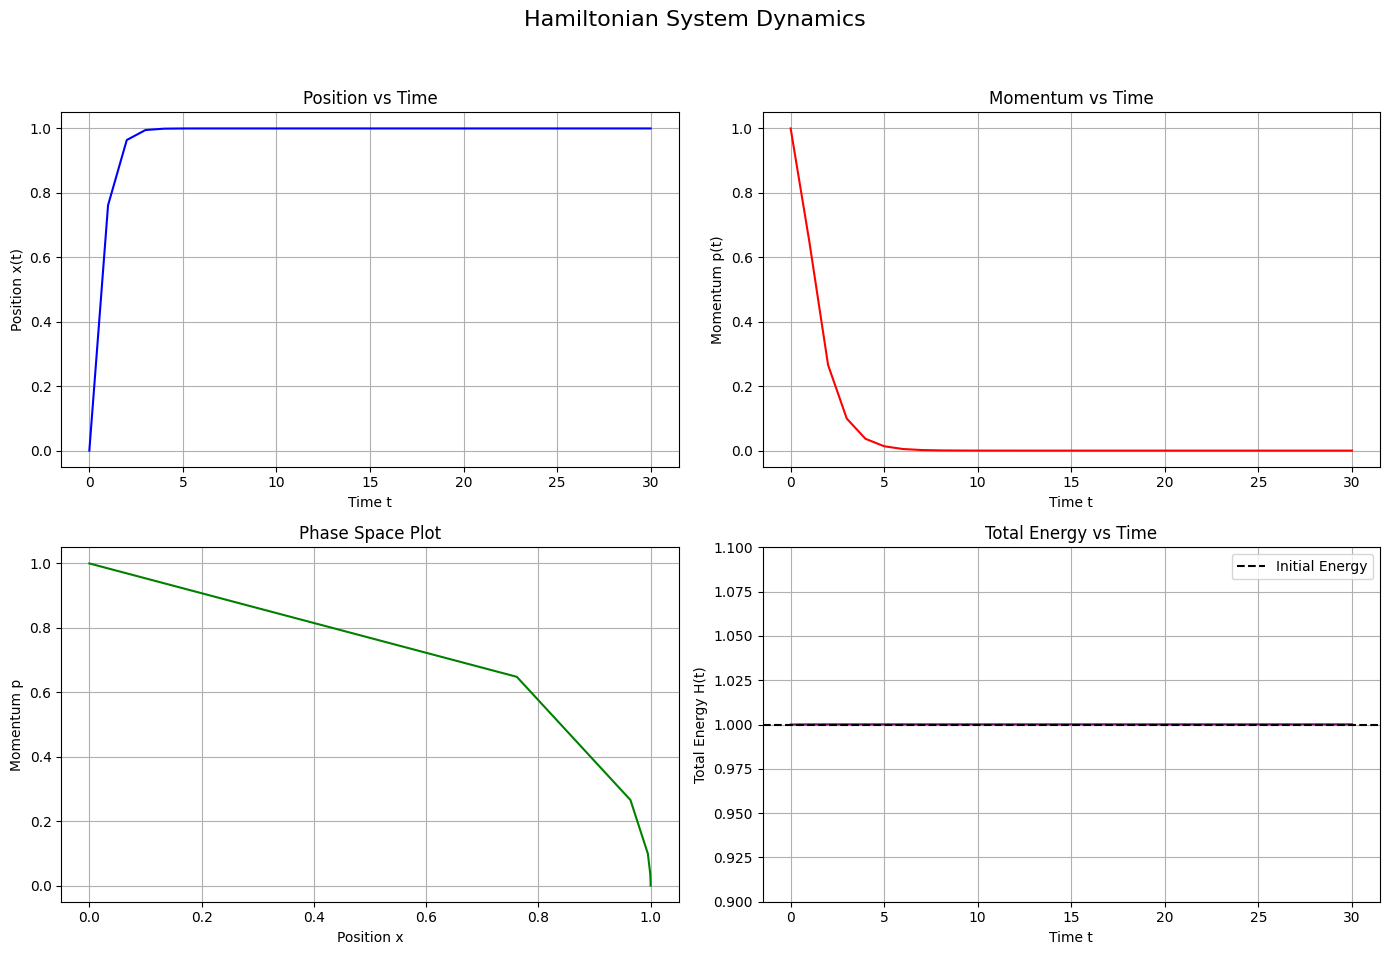

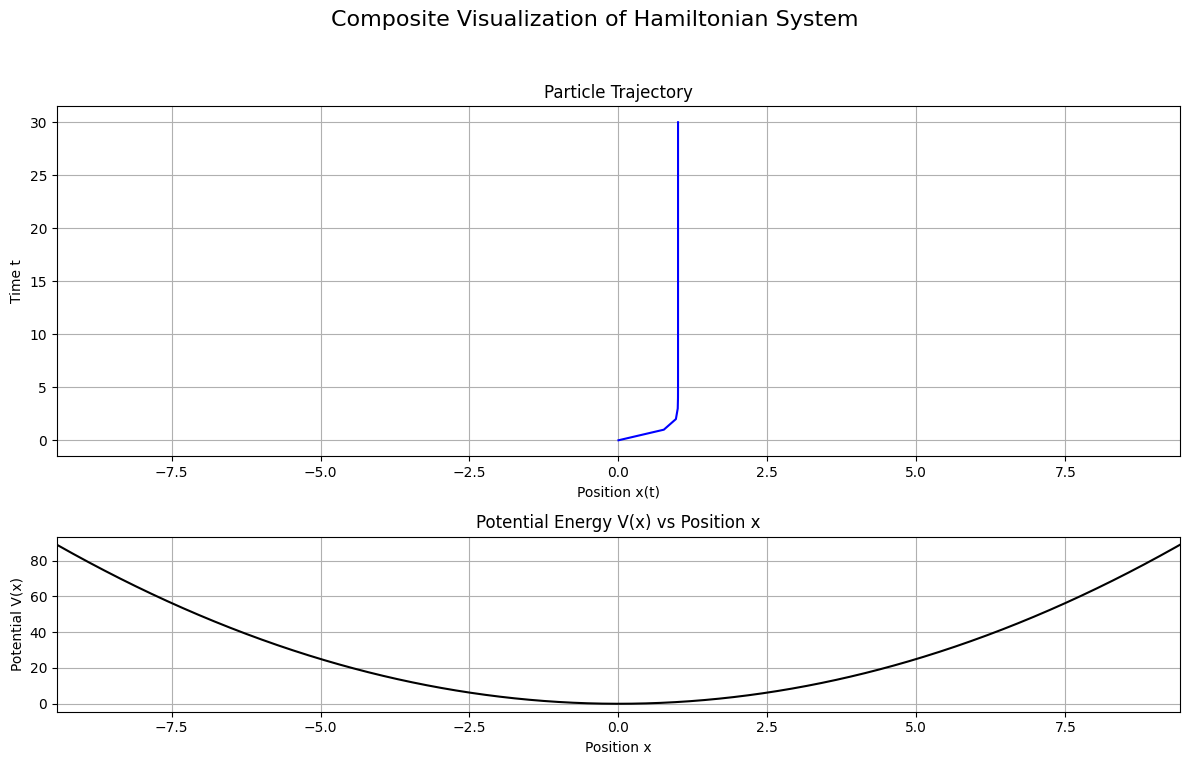

In [5]:
# r = 1.0
delta_t = 0.0001  # Time step
r0 = 1.0

nambu_system = NambuSystem(x_dot, p_dot, r_dot, t_max, delta_t)

t_array, x_array, p_array, r_array = nambu_system.simulate(x0, p0, r0)

t_sampled, x_sampled, p_sampled, r_sampled = nambu_system.pick_data(t_array, x_array, p_array, r_array)

from module.plot_class import Plotter
energy_sampled = 0.5 * (p_sampled**2) / m + 0.5 * (r_sampled**2) / m + k2 * (x_sampled**2) / 2
potential = lambda x: k2 * (x**2) / 2

plotter = Plotter()
plotter.static_plots(t_sampled, x_sampled, p_sampled, energy_sampled)
plotter.trajectory_plot(x_sampled, t_sampled, potential)

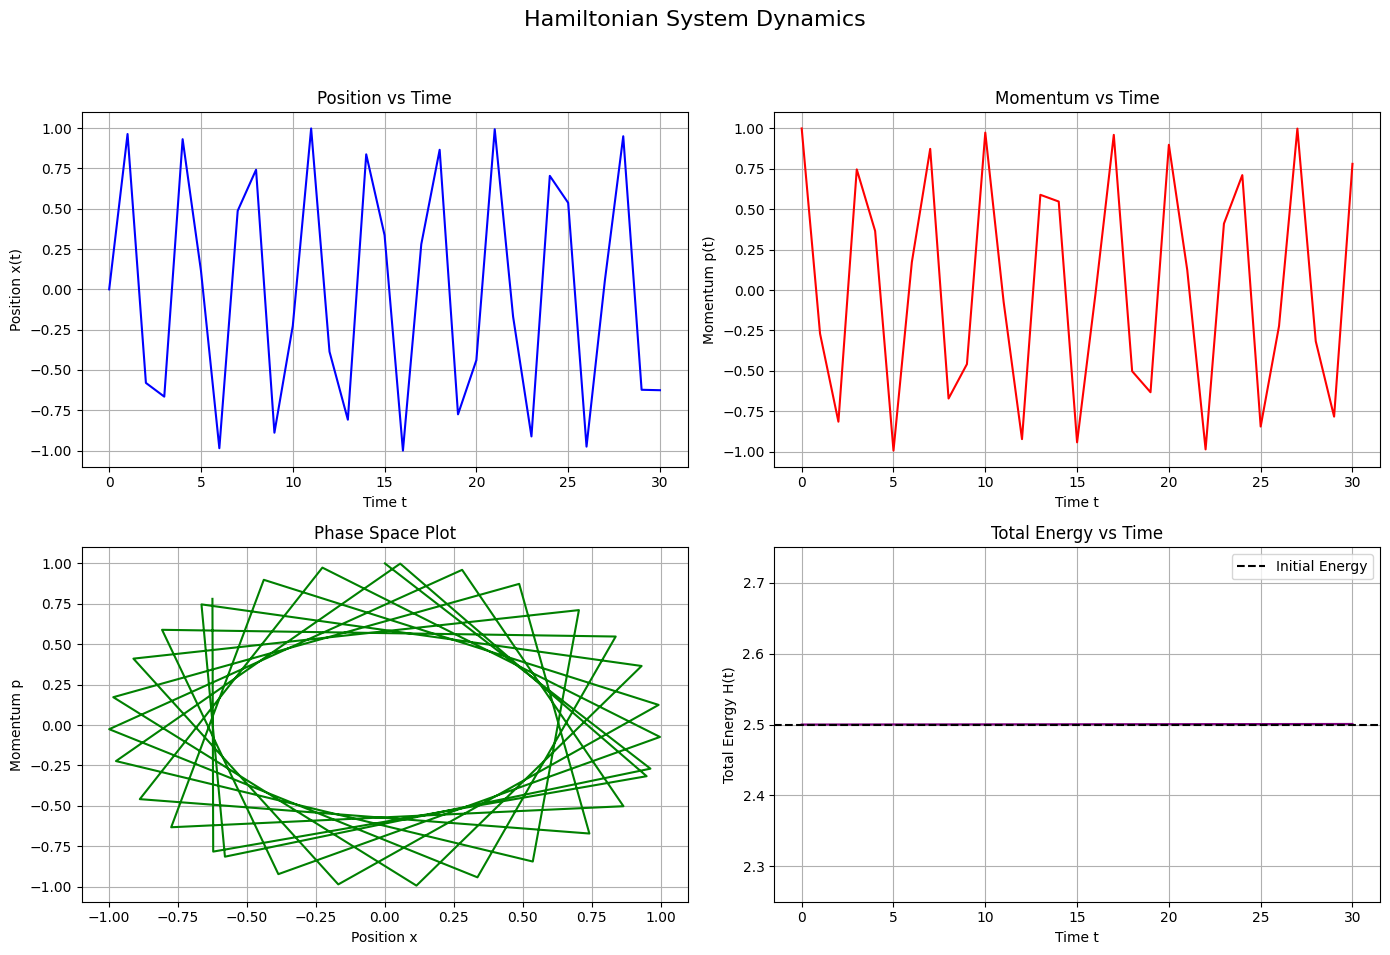

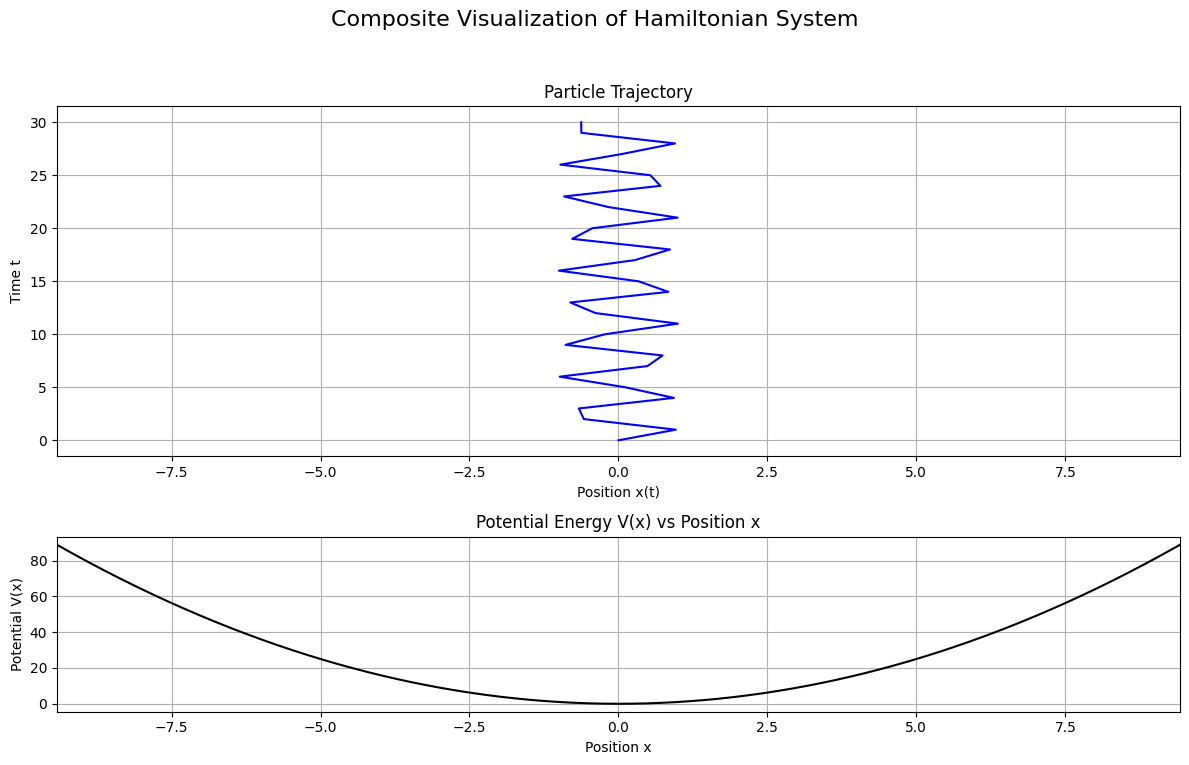

In [6]:
# r = 2.0
delta_t = 0.00001  # Time step
r0 = 2.0

nambu_system = NambuSystem(x_dot, p_dot, r_dot, t_max, delta_t)

t_array, x_array, p_array, r_array = nambu_system.simulate(x0, p0, r0)

t_sampled, x_sampled, p_sampled, r_sampled = nambu_system.pick_data(t_array, x_array, p_array, r_array)

from module.plot_class import Plotter
energy_sampled = 0.5 * (p_sampled**2) / m + 0.5 * (r_sampled**2) / m + k2 * (x_sampled**2) / 2
potential = lambda x: k2 * (x**2) / 2

plotter = Plotter()
plotter.static_plots(t_sampled, x_sampled, p_sampled, energy_sampled)
plotter.trajectory_plot(x_sampled, t_sampled, potential)

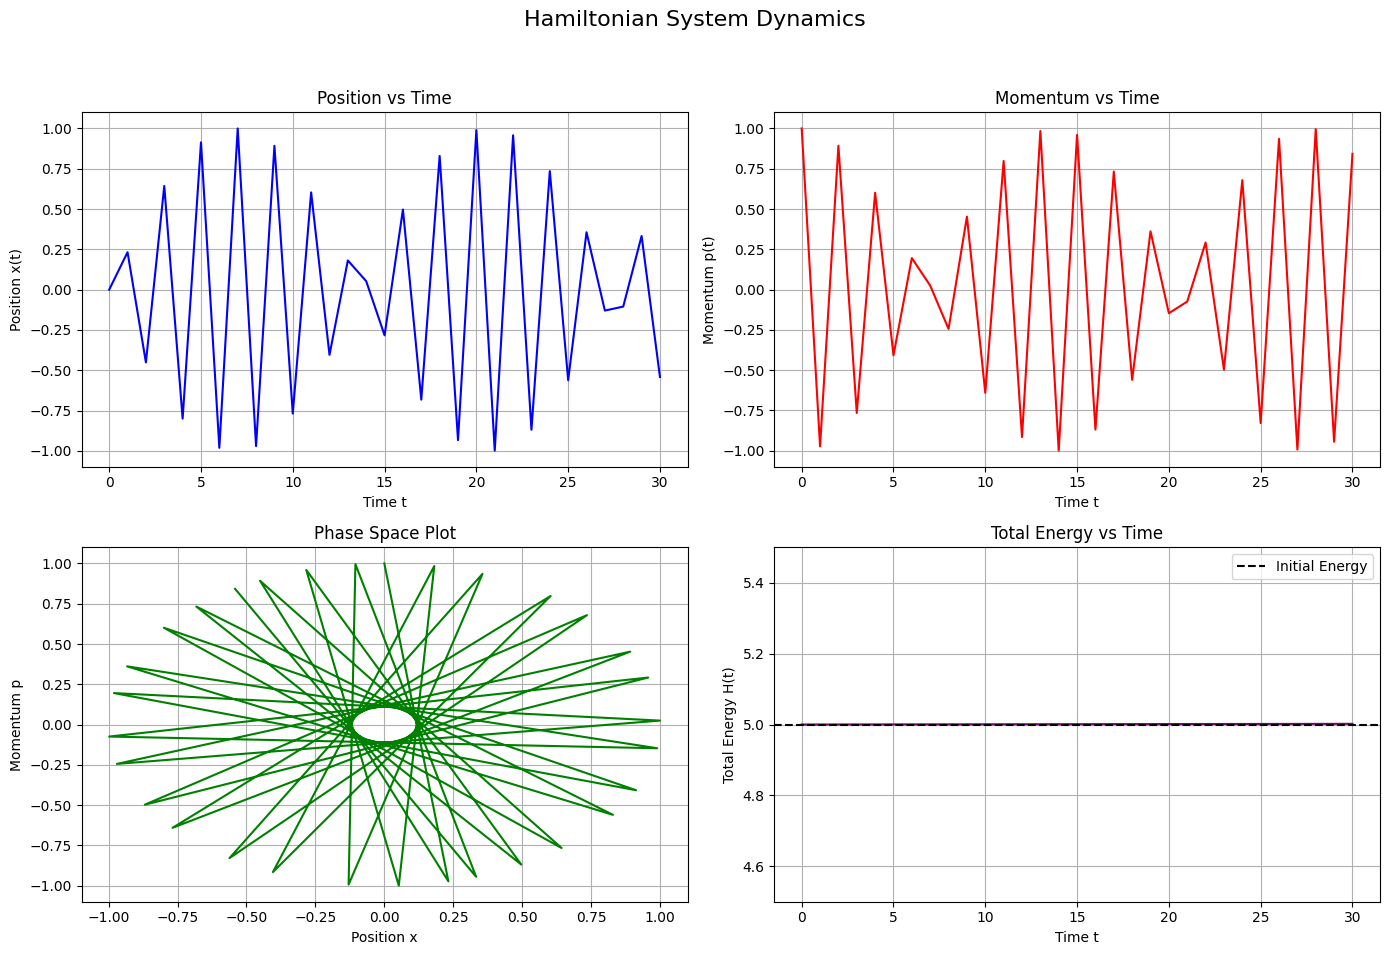

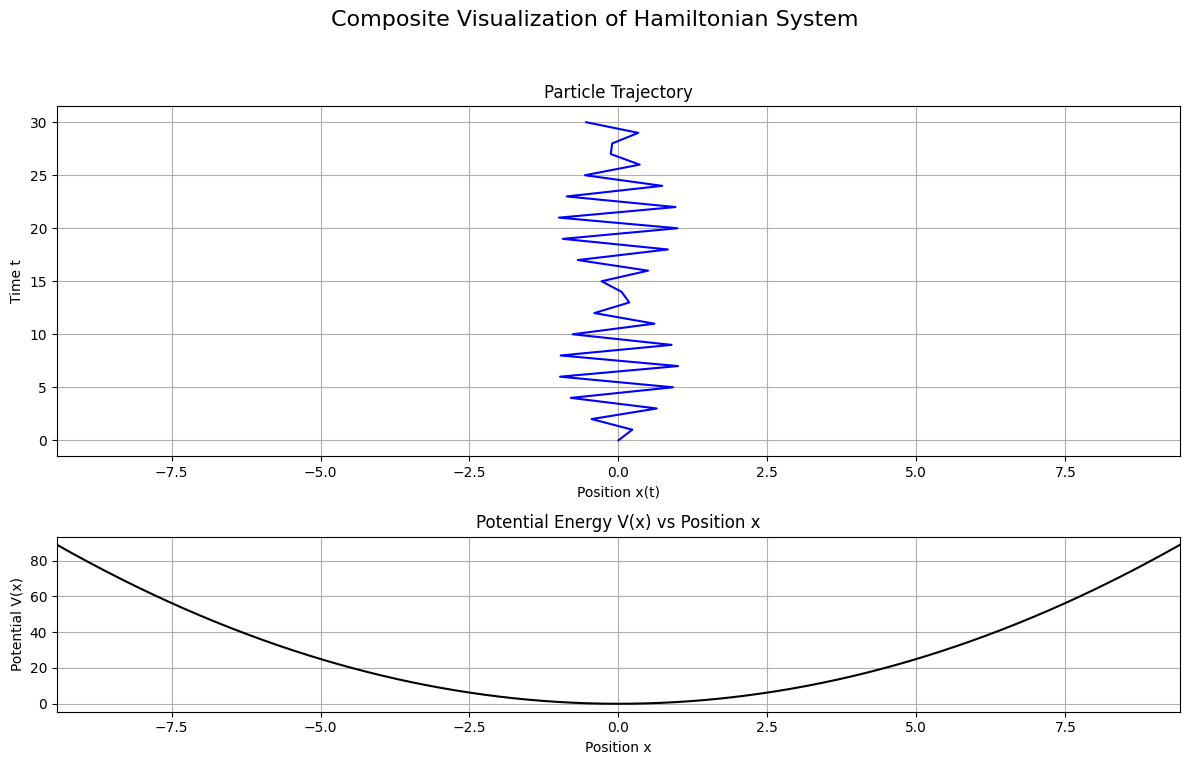

In [7]:
#! r = 3.0
delta_t = 0.00001  # Time step
r0 = 3.0

nambu_system = NambuSystem(x_dot, p_dot, r_dot, t_max, delta_t)

t_array, x_array, p_array, r_array = nambu_system.simulate(x0, p0, r0)

t_sampled, x_sampled, p_sampled, r_sampled = nambu_system.pick_data(t_array, x_array, p_array, r_array)

from module.plot_class import Plotter
energy_sampled = 0.5 * (p_sampled**2) / m + 0.5 * (r_sampled**2) / m + k2 * (x_sampled**2) / 2
potential = lambda x: k2 * (x**2) / 2

plotter = Plotter()
plotter.static_plots(t_sampled, x_sampled, p_sampled, energy_sampled)
plotter.trajectory_plot(x_sampled, t_sampled, potential)

## Sine Potential

In [8]:
# Define the parameters
t_max = 30.0  # Maximum time

# Fixed initial condition
x0, p0 = 0.0, 1.0

### Hamiltonian Dynamics

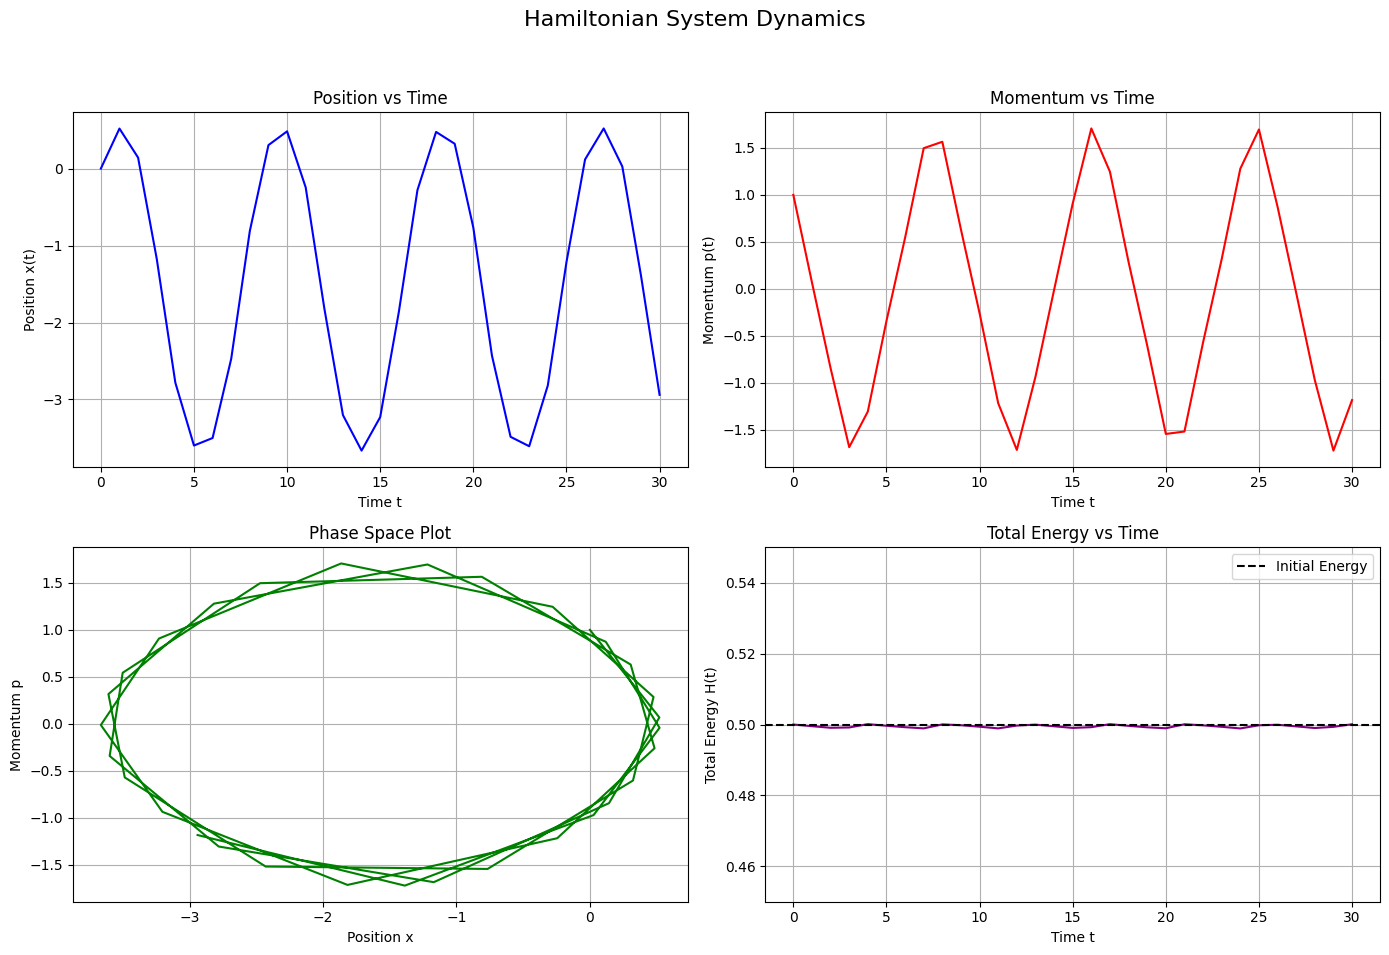

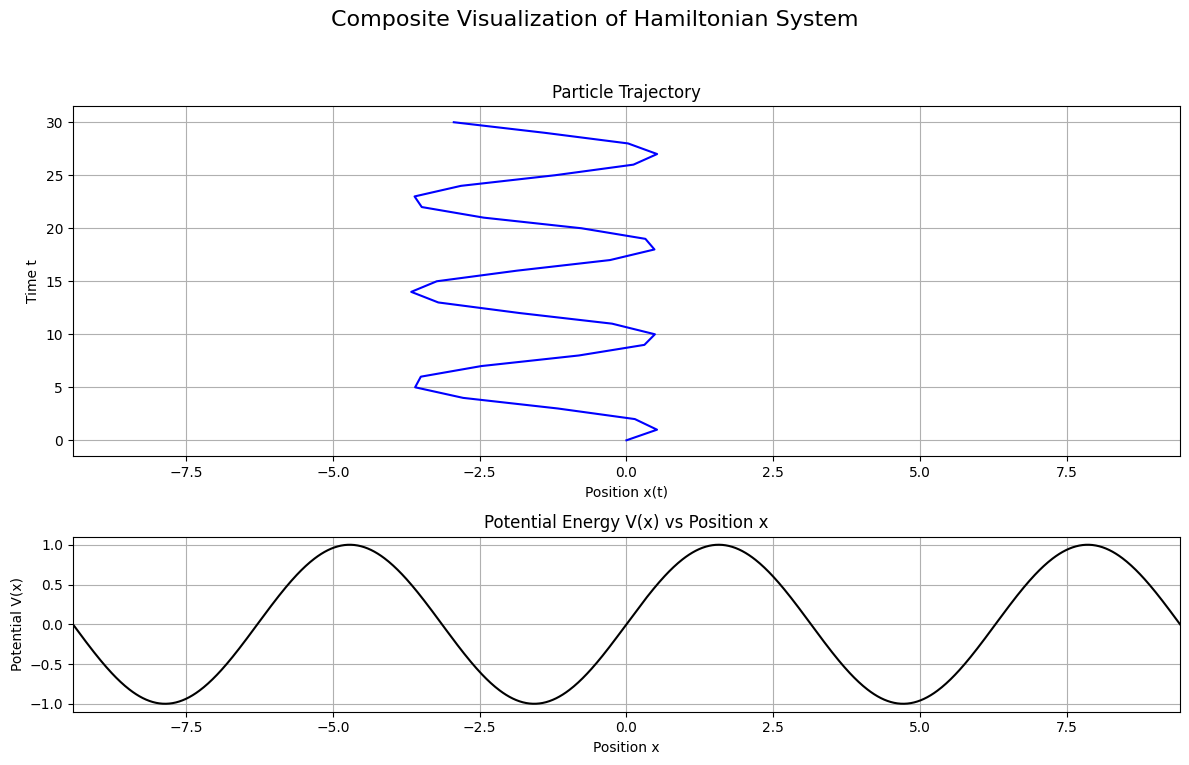

In [9]:
# Define the parameters
delta_t = 0.001  # Time step
k1 = 1.0  # Coefficient of the sine potential
m = 1.0  # Mass

def p_dot(x, p):
    return - k1 * np.cos(x)  # For sine potential, dp/dt = -cos(x)

def x_dot(x, p):
    return p / m  # For sine potential, dx/dt = p / m

# Create Hamiltonian system
hamilton_system = HamiltonSystem(p_dot, x_dot, t_max, delta_t)

# Simulate for the fixed initial condition
t_array, x_array, p_array = hamilton_system.simulate(x0, p0)

# Sample the data
t_sampled, x_sampled, p_sampled = hamilton_system.pick_data(t_array, x_array, p_array)

# Calculate energy
energy_sampled = 0.5 * (p_sampled**2) / m + k1 * np.sin(x_sampled)
potential = lambda x: k1 * np.sin(x)

# Plotting
plotter = Plotter()
plotter.static_plots(t_sampled, x_sampled, p_sampled, energy_sampled)
plotter.trajectory_plot(x_sampled, t_sampled, potential)

### Nambu Dynamics

In [10]:
'''
H = p^2 / 2 + k * sin(x) + r^2 / 2
G = r^2 / 2 + k * sin(x) / 2

x_dot = dH/dp * dG/dr - dH/dr * dG/dp = p * r - r * 0
p_dot = dH/dr * dG/dx - dH/dx * dG/dr = r * k * cos(x)/2 - k * cos(x) * r
r_dot = dH/dx * dG/dp - dH/dp * dG/dx = k * cos(x) * 0 - p * k * cos(x)/2
'''

# Define the parameters
k2 = 2.0  # Coefficient of the sine potential
m = 1.0  # Mass

def x_dot(x, p, r):
    return p * r

def p_dot(x, p, r):
    return r * k2 * np.cos(x) / 2 - k2 * np.cos(x) * r

def r_dot(x, p, r):
    return - p * k2 * np.cos(x) / 2


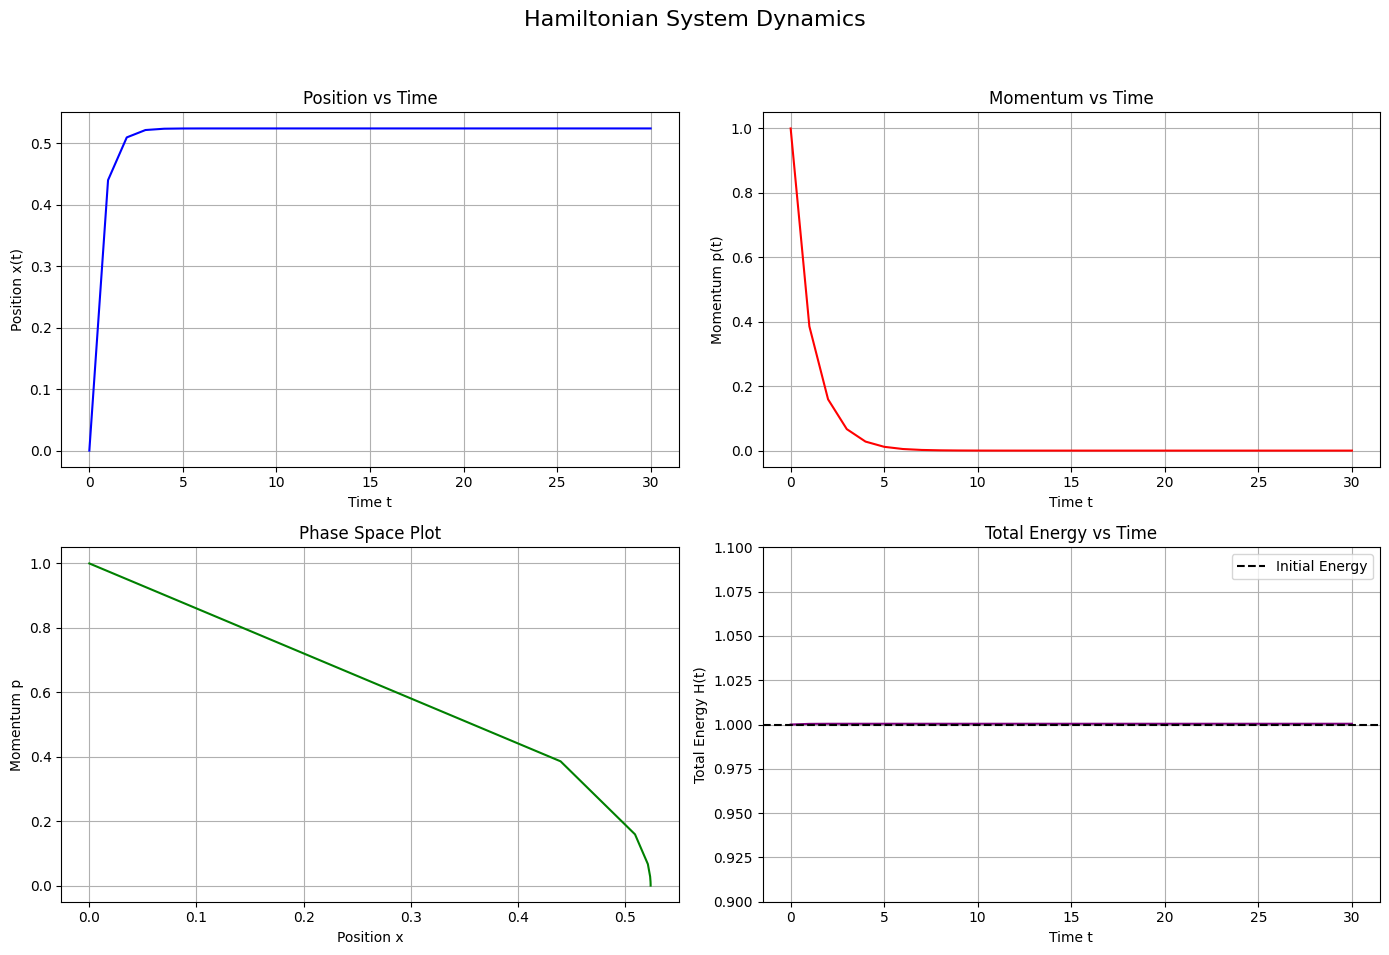

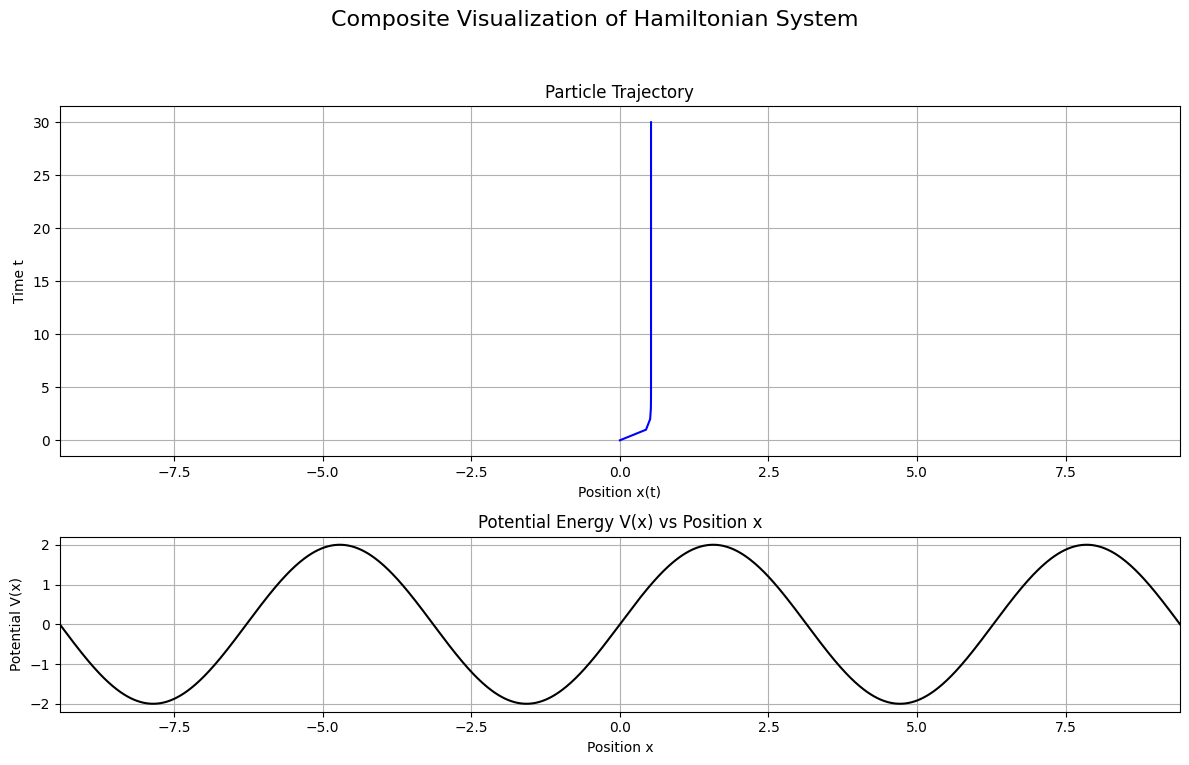

In [11]:
# r = 1.0
delta_t = 0.001  # Time step
r0 = 1.0

# Create Hamiltonian system
nambu_system = NambuSystem(x_dot, p_dot, r_dot, t_max, delta_t)

# Simulate for the fixed initial condition
t_array, x_array, p_array, r_array = nambu_system.simulate(x0, p0, r0)

# Sample the data
t_sampled, x_sampled, p_sampled, r_sampled = nambu_system.pick_data(t_array, x_array, p_array, r_array)

# Calculate energy
energy_sampled = 0.5 * (p_sampled**2) + k2 * np.sin(x_sampled) + 0.5 * (r_sampled**2)
potential = lambda x: k2 * np.sin(x)

# Plotting
plotter = Plotter()
plotter.static_plots(t_sampled, x_sampled, p_sampled, energy_sampled)
plotter.trajectory_plot(x_sampled, t_sampled, potential)

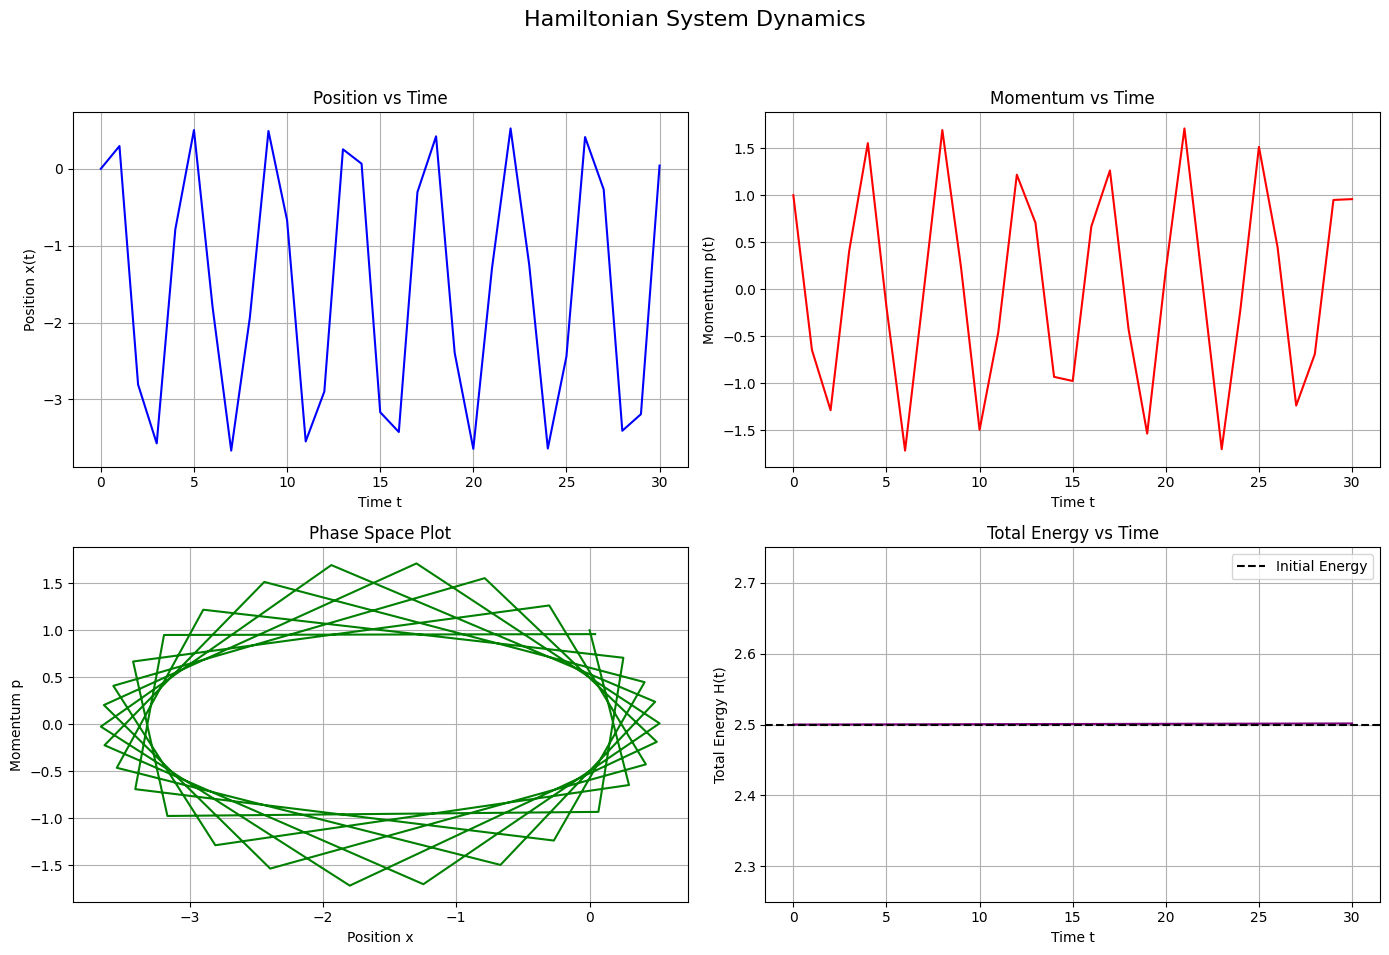

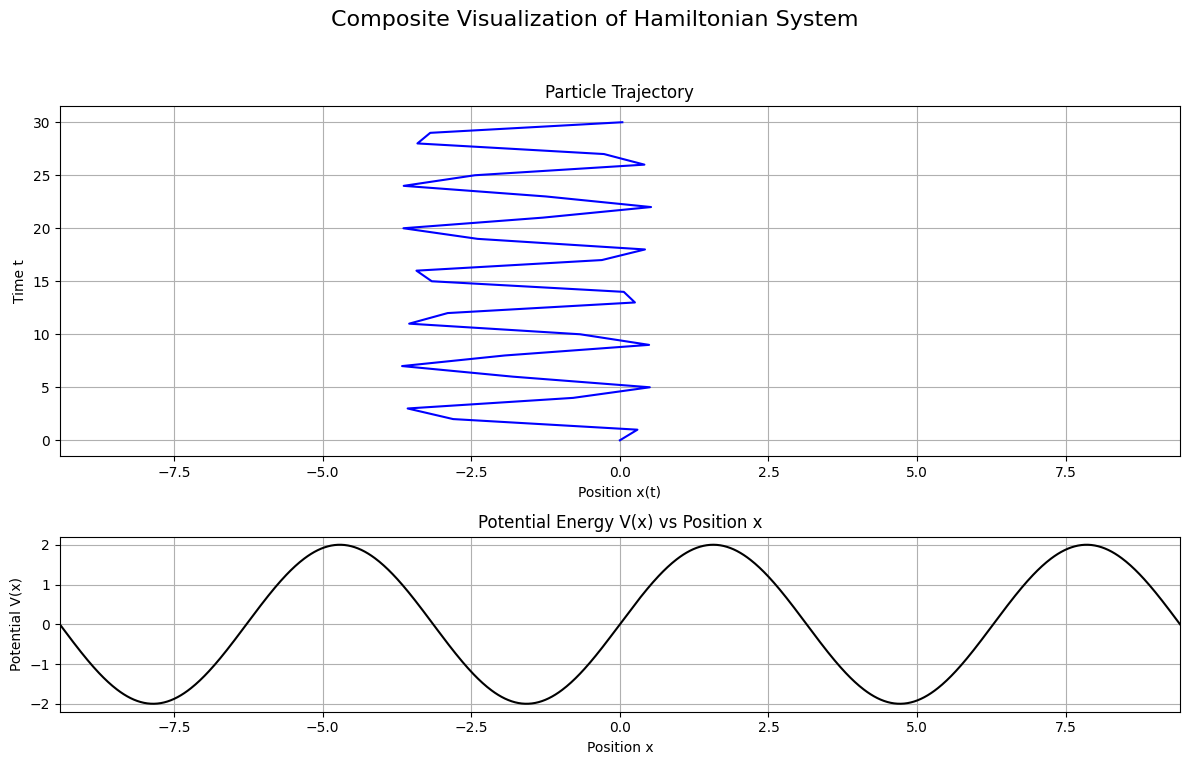

In [12]:
# r = 2.0
delta_t = 0.00001  # Time step
r0 = 2.0

# Create Hamiltonian system
nambu_system = NambuSystem(x_dot, p_dot, r_dot, t_max, delta_t)

# Simulate for the fixed initial condition
t_array, x_array, p_array, r_array = nambu_system.simulate(x0, p0, r0)

# Sample the data
t_sampled, x_sampled, p_sampled, r_sampled = nambu_system.pick_data(t_array, x_array, p_array, r_array)

# Calculate energy
energy_sampled = 0.5 * (p_sampled**2) + k2 * np.sin(x_sampled) + 0.5 * (r_sampled**2)
potential = lambda x: k2 * np.sin(x)

# Plotting
plotter = Plotter()
plotter.static_plots(t_sampled, x_sampled, p_sampled, energy_sampled)
plotter.trajectory_plot(x_sampled, t_sampled, potential)

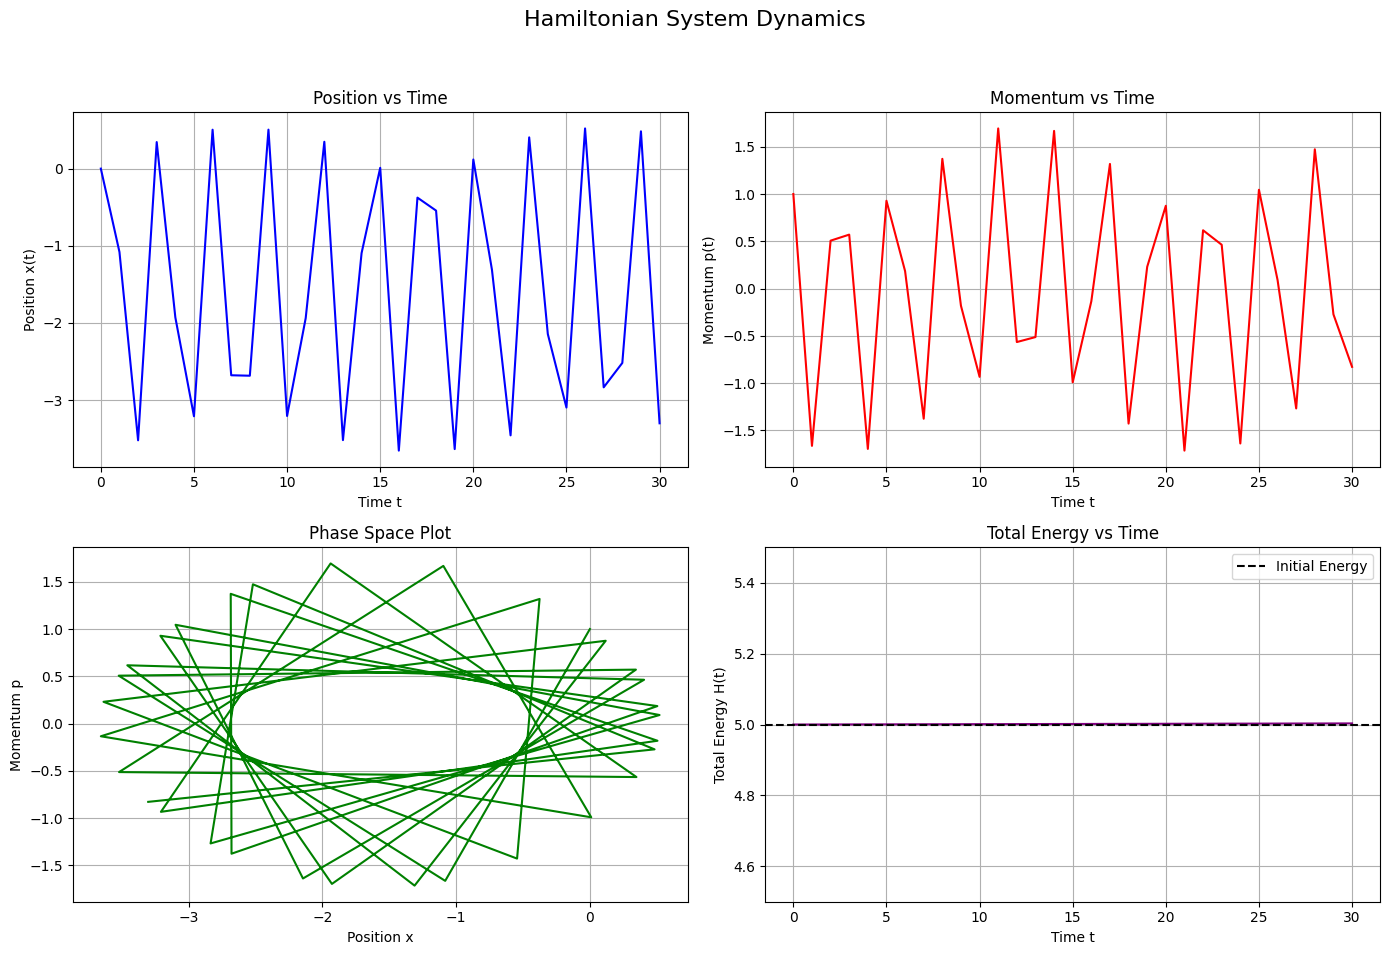

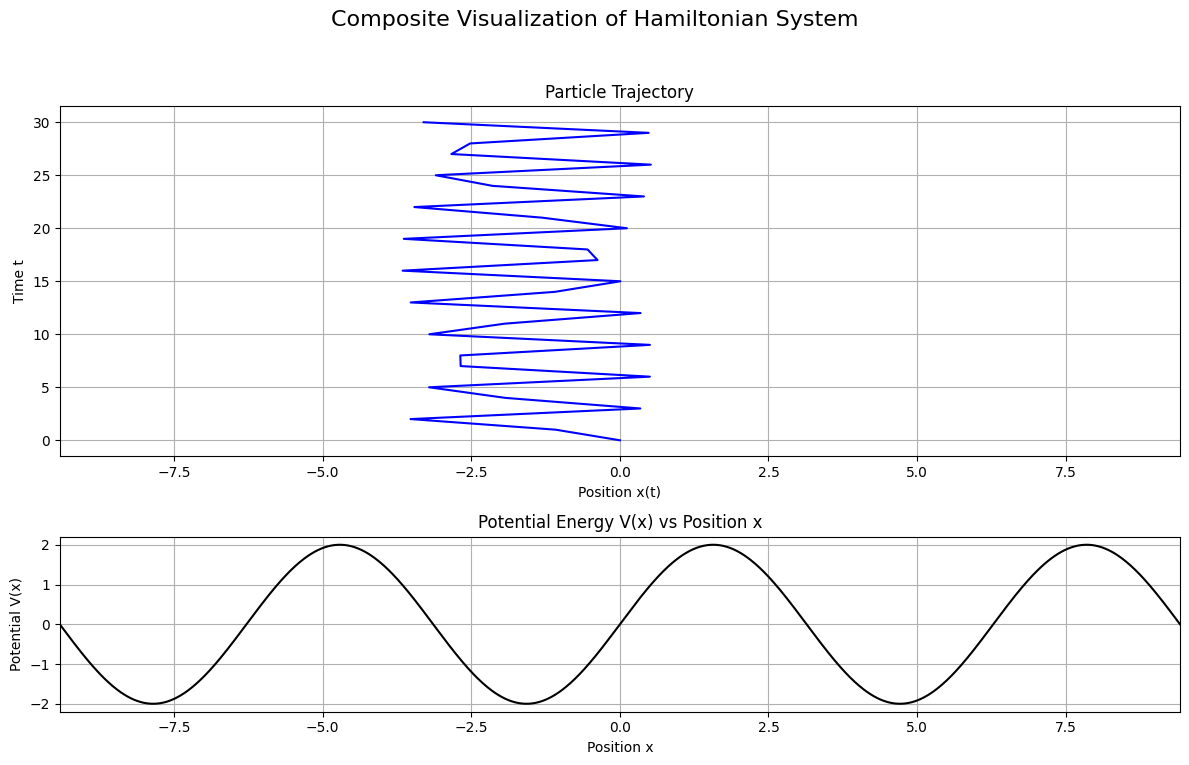

In [13]:
# r = 3.0
delta_t = 0.00001  # Time step
r0 = 3.0

# Create Hamiltonian system
nambu_system = NambuSystem(x_dot, p_dot, r_dot, t_max, delta_t)

# Simulate for the fixed initial condition
t_array, x_array, p_array, r_array = nambu_system.simulate(x0, p0, r0)

# Sample the data
t_sampled, x_sampled, p_sampled, r_sampled = nambu_system.pick_data(t_array, x_array, p_array, r_array)

# Calculate energy
energy_sampled = 0.5 * (p_sampled**2) + k2 * np.sin(x_sampled) + 0.5 * (r_sampled**2)
potential = lambda x: k2 * np.sin(x)

# Plotting
plotter = Plotter()
plotter.static_plots(t_sampled, x_sampled, p_sampled, energy_sampled)
plotter.trajectory_plot(x_sampled, t_sampled, potential)